# Comparative analysis of sequencing technologies for single-cell transcriptomics
## Abstract
All single-cell RNA-seq protocols and technologies require library preparation prior to sequencing on a platform such as Illumina. Here, we present the first report to utilize the BGISEQ-500 platform for scRNA-seq, and compare the sensitivity and accuracy to Illumina sequencing. We generate a scRNA-seq resource of 468 unique single-cells and 1,297 matched single cDNA samples, performing SMARTer and Smart-seq2 protocols on mESCs and K562 cells with RNA spike-ins. We sequence these libraries on both BGISEQ-500 and Illumina HiSeq platforms using single- and paired-end reads. The two platforms have comparable sensitivity and accuracy in terms of quantification of gene expression, and low technical variability. Our study provides a standardised scRNA-seq resource to benchmark new scRNA-seq library preparation protocols and sequencing platforms.

# Data proccessing

SCQUA is a python package that we developed for analyzing the single cell RNA Sequencing quality.

In [1]:
%pylab inline
from SCQUA import *

Populating the interactive namespace from numpy and matplotlib


/Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
ls ../

Figs/   data/   docs/   jup/    pdata/  pdata1/


> Figs include the resulted figures  
> data include all the raw data  
> jup include the jupyter notebook to process the data and make the figures  
> pdata include all the processed data.  

In [3]:
ls ../data/

bgi_263_722_ann.xlsx     bgi_ds_e6_tpm.csv.gz     sanger_ds_e4_qc.csv.gz
bgi_cts.csv.gz           bgi_qc.csv.gz            sanger_ds_e4_tpm.csv.gz
bgi_ds_e4_cts.csv.gz     bgi_se_cts.csv.gz        sanger_ds_e5_cts.csv.gz
bgi_ds_e4_qc.csv.gz      bgi_se_qc.csv.gz         sanger_ds_e5_qc.csv.gz
bgi_ds_e4_tpm.csv.gz     bgi_se_tpm.csv.gz        sanger_ds_e5_tpm.csv.gz
bgi_ds_e5_cts.csv.gz     bgi_tpm.csv.gz           sanger_ds_e6_cts.csv.gz
bgi_ds_e5_qc.csv.gz      phn.csv                  sanger_ds_e6_qc.csv.gz
bgi_ds_e5_tpm.csv.gz     sanger.csv               sanger_ds_e6_tpm.csv.gz
bgi_ds_e6_cts.csv.gz     sanger_cts.csv.gz        sanger_qc.csv.gz
bgi_ds_e6_qc.csv.gz      sanger_ds_e4_cts.csv.gz  sanger_tpm.csv.gz


[Salmon](https://salmon.readthedocs.io/en/latest/salmon.html) outputs 3 information, the counts, tpm and qc metrics. We concatenate these information in \*cts.gz, \*tpm.gz and \*qc.gz.

detection limit (sensitivity) and accuracy based on spike-ins can be calculated. 

In [3]:
ercc = get_ERCC()
sirv = get_SIRV()
spike = pd.concat([ercc,sirv])

> Get results for all the datasets.

In [54]:
for f in iglob('../data/*_tpm.csv.gz'):
    name = f.split('/')[-1].replace('_tpm.csv.gz',"")
    print(name)
    cts = pd.read_csv(f.replace('tpm','cts'), index_col=0)
    tpm = pd.read_csv(f, index_col=0)
    phn = pd.read_csv(f.replace('tpm','qc'), index_col=0)
    df = get_result(tpm, ercc, sirv, spike)
    phn = pd.concat([phn,df,cts.loc[cts.index.str.startswith("ENS")].T], axis=1)
    phn["Total_counts"] = cts.loc[cts.index.str.startswith("ENS")].sum()
    phn["study"] = name
    phn.to_csv("../pdata/%s.csv"%name)

sanger_ds_e4


 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

sanger


 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

sanger_ds_e6


 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

bgi_ds_e5


 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

sanger_ds_e5


 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

bgi


 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

bgi_se


 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

bgi_ds_e6


 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

bgi_ds_e4


 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: Runtim

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log
 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/SCQUA-0.0.1-py3.6.egg/SCQUA/__init__.py:55: RuntimeWarning:divide by zero encountered in log


This file is annotation of the all the cells sequenced.

In [2]:
phn = pd.read_csv("../data/phn.csv",index_col=0)

In [3]:
phn.head()

,Batch,Cell,Cell_line,Fullname,Place,Platform,Protocol,Protocol2,Read_type,Well,repeat
ERR1901831,SMARTer,2,ESC,SMARTer_2,UK,HiSeq-2000,SMARTer,HiSeq-2000 SMARTer,PE,UNK,SMARTer
ERR1901830,SMARTer,1,ESC,SMARTer_1,UK,HiSeq-2000,SMARTer,HiSeq-2000 SMARTer,PE,UNK,SMARTer
ERR1901832,SMARTer,3,ESC,SMARTer_3,UK,HiSeq-2000,SMARTer,HiSeq-2000 SMARTer,PE,UNK,SMARTer
ERR1901833,SMARTer,4,ESC,SMARTer_4,UK,HiSeq-2000,SMARTer,HiSeq-2000 SMARTer,PE,UNK,SMARTer
ERR1901834,SMARTer,5,ESC,SMARTer_5,UK,HiSeq-2000,SMARTer,HiSeq-2000 SMARTer,PE,UNK,SMARTer


In [7]:
phn.tail()

,Batch,Cell,Cell_line,Fullname,Place,Platform,Protocol,Protocol2,Read_type,Well,repeat
Index_CWHPEI17060082,ESC_AR_P101_H,8,ESC,ESC_A111_P101_H_08,China,Hiseq4000,Smart-Seq2,Hiseq4000 ESC Library rep,PE101,UNK,ESC Library rep
Index_CWHPEI17060083,ESC_AR_P101_H,9,ESC,ESC_A111_P101_H_09,China,Hiseq4000,Smart-Seq2,Hiseq4000 ESC Library rep,PE101,UNK,ESC Library rep
Index_CWHPEI17060084,ESC_AR_P101_H,10,ESC,ESC_A111_P101_H_10,China,Hiseq4000,Smart-Seq2,Hiseq4000 ESC Library rep,PE101,UNK,ESC Library rep
Index_CWHPEI17060085,ESC_AR_P101_H,11,ESC,ESC_A111_P101_H_11,China,Hiseq4000,Smart-Seq2,Hiseq4000 ESC Library rep,PE101,UNK,ESC Library rep
Index_CWHPEI17060086,ESC_AR_P101_H,12,ESC,ESC_A111_P101_H_12,China,Hiseq4000,Smart-Seq2,Hiseq4000 ESC Library rep,PE101,UNK,ESC Library rep


> map the annotation

In [18]:
for f in iglob("../pdata/*.csv"):
    print(f)
    fout = f.replace("pdata","pdata1")
    df = pd.read_csv(f,index_col=0)
    df = df.loc[df.index.isin(phn.index)]
    dfp = phn.loc[df.index]
    df = pd.concat([df, dfp], axis=1)
    df.to_csv(fout)

../pdata/sanger_ds_e6.csv
../pdata/bgi_ds_e5.csv
../pdata/bgi_ds_e4.csv
../pdata/sanger_ds_e5.csv
../pdata/bgi_ds_e6.csv
../pdata/sanger_ds_e4.csv
../pdata/sanger.csv
../pdata/bgi.csv
../pdata/bgi_se.csv


## Fig 1B 1C
(B) Single-cell detection limit (Sensitivity) of mESC cells, downsampled across two orders of magnitude from SMARTer and two Smart-seq2 replicates (633 samples). The single-cell sensitivities are largely similar between different library preparation across scRNA-seq protocols. (C) Single-cell accuracy of mESC cells, downsampled across two orders of magnitude for SMARTer and two Smart-seq2 replicates (633 samples). The grey dotted lines indicate downsampling at different read depths per cell, while red line indicates saturation per cell.

In [79]:
dfs = []
for f in iglob("../pdata1/*_ds_*"):
    df = pd.read_csv(f, index_col=0)
    df["id"] = df.index
    df.index = df.study+"_"+df.id
    df = df[["id",'Cell','Fullname','num_processed',\
             'detection_limit','accuracy','Protocol','Batch','Protocol2']+
            df.columns[df.columns.str.startswith('ENS')].tolist()]
    dfs.append(df)
df = pd.concat(dfs,axis =0)

In [80]:
df.shape

(1896, 34848)

In [81]:
df.head()

,id,Cell,Fullname,num_processed,detection_limit,accuracy,Protocol,Batch,Protocol2,ENSMUSG00000107196.1,...,ENSMUSG00000083997.1,ENSMUSG00000111337.1,ENSMUSG00000109159.1,ENSMUSG00000107243.1,ENSMUSG00000110425.1,ENSMUSG00000066315.9,ENSMUSG00000073771.11,ENSMUSG00000107035.1,ENSMUSG00000080242.5,ENSMUSG00000081408.1
sanger_ds_e6_ERR1901834,ERR1901834,5,SMARTer_5,1000000,76.121794,0.500011,SMARTer,SMARTer,HiSeq-2000 SMARTer,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,8.27496,1.0,26.4398,0.0
sanger_ds_e6_ERR1901830,ERR1901830,1,SMARTer_1,1000000,111.926773,0.613356,SMARTer,SMARTer,HiSeq-2000 SMARTer,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000982,5.00000,0.0,29.1214,0.0
sanger_ds_e6_ERR1901832,ERR1901832,3,SMARTer_3,1000000,71.153016,0.632203,SMARTer,SMARTer,HiSeq-2000 SMARTer,0.0,...,0.0,1.01072,0.0,0.0,0.0,0.000000,6.22531,0.0,35.2669,0.0
sanger_ds_e6_ERR1901835,ERR1901835,6,SMARTer_6,1000000,71.030314,0.682535,SMARTer,SMARTer,HiSeq-2000 SMARTer,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,30.2924,0.0
sanger_ds_e6_ERR1901833,ERR1901833,4,SMARTer_4,1000000,62.824744,0.628298,SMARTer,SMARTer,HiSeq-2000 SMARTer,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,101.10100,0.0,46.1377,0.0


In [82]:
df=df[df.Protocol.str.startswith("S")]

> use only the protocols in sanger

In [83]:
df = df.loc[~(df.Protocol2.str.startswith('BGISEQ-500 K562')|\
              df.Protocol2.str.startswith('Hiseq4000')|\
              df.Protocol2.str.startswith('BGISEQ-500 ESC'))]

In [84]:
df.Protocol.value_counts()

Smart-Seq2    972
SMARTer       576
Name: Protocol, dtype: int64

In [85]:
df.Protocol2.value_counts()

BGISEQ-500 SMARTer            288
HiSeq-2000 SMARTer            288
HiSeq-2000 Smart-Seq2 rep1    288
BGISEQ-500 Smart-Seq2 rep1    285
BGISEQ-500 Smart-Seq2 rep2    216
HiSeq-2000 Smart-Seq2 rep2    183
Name: Protocol2, dtype: int64

In [86]:
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any')

In [87]:
df.to_csv("../pdata1/Fig1BC.csv")

In [2]:
df = pd.read_csv("../pdata1/Fig1BC.csv", index_col=0)

np.log10(detection_limit) ~ np.power(np.log10(num_processed), 2) + np.log10(num_processed) + C(Protocol2) + 1
                                OLS Regression Results                               
Dep. Variable:     np.log10(detection_limit)   R-squared:                       0.713
Model:                                   OLS   Adj. R-squared:                  0.712
Method:                        Least Squares   F-statistic:                     547.6
Date:                       Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                               15:51:18   Log-Likelihood:                -209.80
No. Observations:                       1548   AIC:                             435.6
Df Residuals:                           1540   BIC:                             478.4
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                              

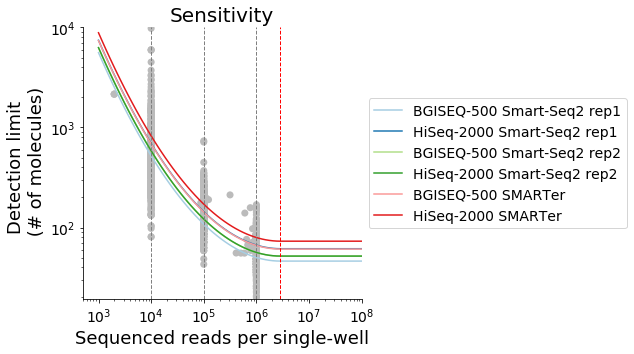

In [88]:
figsize(5,5)
matplotlib.rcParams.update({'font.size': 14})
names = ['BGISEQ-500 Smart-Seq2 rep1','HiSeq-2000 Smart-Seq2 rep1', 
         'BGISEQ-500 Smart-Seq2 rep2','HiSeq-2000 Smart-Seq2 rep2', 
         'BGISEQ-500 SMARTer','HiSeq-2000 SMARTer']
ax = fit_sensitivity(df,key2="num_processed",key3='Protocol2', \
                     yscale='log', xlabel = 'Sequenced reads per single-well',\
                     ylabel = 'Detection limit \n (# of molecules)', \
                     ylim = [0, 1e4], xlim = [500, 1e8], \
                     xlabelsize = 18, ylabelsize = 18, \
                     title = 'Sensitivity', titlesize = 20, names = names)

np.log10(detection_limit) ~ np.power(np.log10(num_processed), 2) + np.log10(num_processed) + C(Protocol2) + 1
                                OLS Regression Results                               
Dep. Variable:     np.log10(detection_limit)   R-squared:                       0.713
Model:                                   OLS   Adj. R-squared:                  0.712
Method:                        Least Squares   F-statistic:                     547.6
Date:                       Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                               15:51:18   Log-Likelihood:                -209.80
No. Observations:                       1548   AIC:                             435.6
Df Residuals:                           1540   BIC:                             478.4
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                              

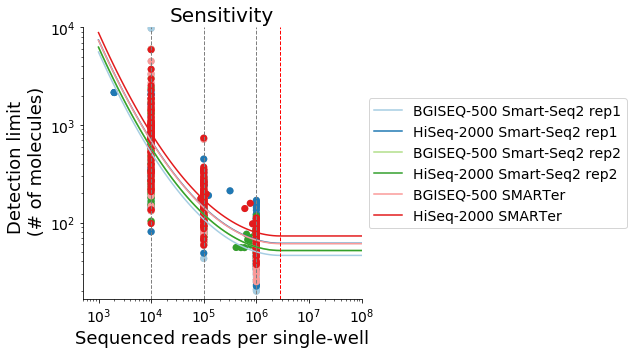

In [89]:
figsize(5,5)
matplotlib.rcParams.update({'font.size': 14})
names = ['BGISEQ-500 Smart-Seq2 rep1','HiSeq-2000 Smart-Seq2 rep1', 
         'BGISEQ-500 Smart-Seq2 rep2','HiSeq-2000 Smart-Seq2 rep2', 
         'BGISEQ-500 SMARTer','HiSeq-2000 SMARTer']
ax = fit_sensitivity(df,key2="num_processed",key3='Protocol2', \
                     yscale='log', xlabel = 'Sequenced reads per single-well',\
                     ylabel = 'Detection limit \n (# of molecules)', \
                     ylim = [0, 1e4], xlim = [500, 1e8], \
                     xlabelsize = 18, ylabelsize = 18, \
                     title = 'Sensitivity', titlesize = 20, names = names, colordots = True)

accuracy ~ np.power(np.log10(num_processed), 2) + np.log10(num_processed) + C(Protocol2) + 1
                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sat, 01 Dec 2018   Prob (F-statistic):          3.30e-139
Time:                        15:51:19   Log-Likelihood:                 1019.8
No. Observations:                1548   AIC:                            -2024.
Df Residuals:                    1540   BIC:                            -1981.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
------

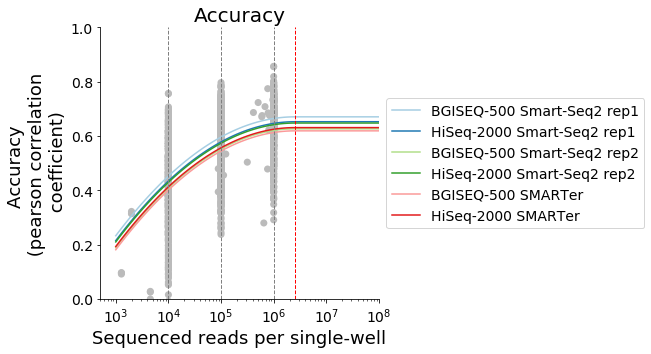

In [90]:
ax = fit_sensitivity(df, fun = 'accuracy',key1="accuracy",key2="num_processed",key3='Protocol2', \
                     xlabel = 'Sequenced reads per single-well',\
                     ylabel = 'Accuracy \n (pearson correlation \n coefficient)', \
                     ylim = [0, 1], xlim = [500, 1e8], \
                     xlabelsize = 18, ylabelsize = 18, \
                     title = 'Accuracy', titlesize = 20, names = names)

accuracy ~ np.power(np.log10(num_processed), 2) + np.log10(num_processed) + C(Protocol2) + 1
                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sat, 01 Dec 2018   Prob (F-statistic):          3.30e-139
Time:                        15:51:20   Log-Likelihood:                 1019.8
No. Observations:                1548   AIC:                            -2024.
Df Residuals:                    1540   BIC:                            -1981.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
------

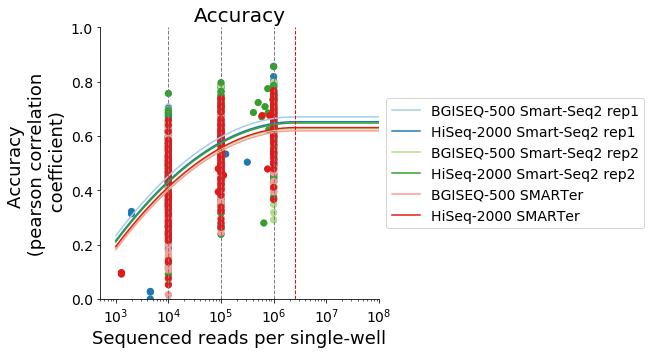

In [91]:
ax = fit_sensitivity(df, fun = 'accuracy',key1="accuracy",key2="num_processed",key3='Protocol2', \
                     xlabel = 'Sequenced reads per single-well',\
                     ylabel = 'Accuracy \n (pearson correlation \n coefficient)', \
                     ylim = [0, 1], xlim = [500, 1e8], \
                     xlabelsize = 18, ylabelsize = 18, \
                     title = 'Accuracy', titlesize = 20, names = names, colordots=True)

## Fig 1D 1E

 (D) PCA for matched single-cell cDNA samples performed using SMARTer and two replicates of Smart-seq2 and sequenced across both sequencing platforms. Red and green colored circles indicate sequencing of matched cDNA on Illumina HiSeq2500 and BGISEQ-500 respectively. The dotted lines represent distance i.e. measure of similarity across sequencing platforms. (E) Single-cell correlations for each scRNA-seq protocol and across sequencing platforms. The correlations (R=0.52~0.70) are comparable between sequencing platforms. 

In [2]:
df = pd.read_csv("../pdata1/Fig1BC.csv", index_col=0)

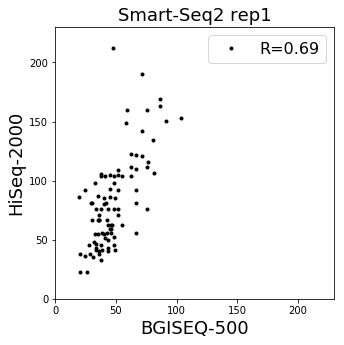

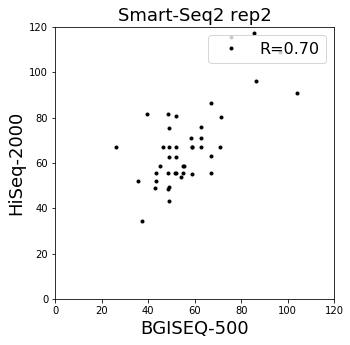

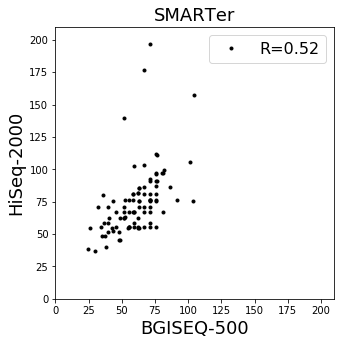

In [57]:
figsize(5,5)
dfs1 = []
dfs2 = []
for p, l in zip(['Smart-Seq2 rep1','Smart-Seq2 rep2','SMARTer'],[230, 120, 210]):
    df1, df2 = plot_Fig1E(df, protocol = p,\
        lim = l,\
        xlabel = "BGISEQ-500", ylabel="HiSeq-2000",\
        xlabelsize = 18, ylabelsize=18, titlesize = 18, legendsize = 16)
    plt.show()
    dfs1.append(df1)
    dfs2.append(df2)

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning:Data with input dtype float32 were all converted to float64 by the scale function.


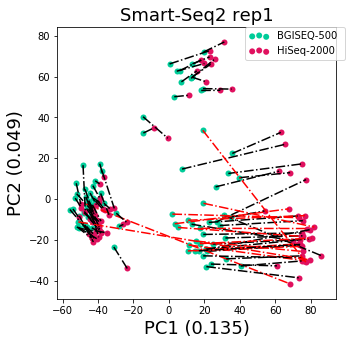

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning:Data with input dtype float32 were all converted to float64 by the scale function.


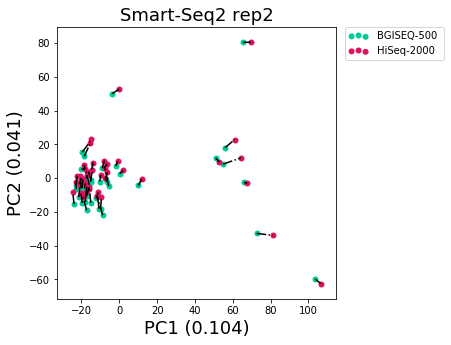

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning:Data with input dtype float32 were all converted to float64 by the scale function.


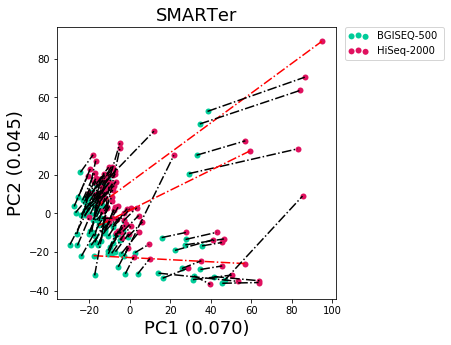

In [39]:
i=0
protocols = ['Smart-Seq2 rep1','Smart-Seq2 rep2','SMARTer']
for df1, df2 in zip(dfs1, dfs2):
    plt.clf()
    plot_Fig1D(df1, df2, protocol = protocols[i], xlabelsize = 18, ylabelsize=18, titlesize = 18)
    plt.show()
    i+=1

## Fig 2B

In [31]:
dfs = []
for f in iglob("../pdata1/*_ds_*"):
    df = pd.read_csv(f, index_col=0)
    df["id"] = df.index
    df.index = df.study+"_"+df.id
    df = df[["id",'Cell','Fullname','num_processed',\
             'detection_limit_ERCC','accuracy_ERCC','Protocol','Batch','Protocol2']+
            df.columns[df.columns.str.startswith('ENS')].tolist()]
    dfs.append(df)
df = pd.concat(dfs,axis =0)

In [32]:
df.shape

(1896, 34848)

In [33]:
df.head()

,id,Cell,Fullname,num_processed,detection_limit_ERCC,accuracy_ERCC,Protocol,Batch,Protocol2,ENSMUSG00000107196.1,...,ENSMUSG00000083997.1,ENSMUSG00000111337.1,ENSMUSG00000109159.1,ENSMUSG00000107243.1,ENSMUSG00000110425.1,ENSMUSG00000066315.9,ENSMUSG00000073771.11,ENSMUSG00000107035.1,ENSMUSG00000080242.5,ENSMUSG00000081408.1
sanger_ds_e6_ERR1901834,ERR1901834,5,SMARTer_5,1000000,216.716935,0.724199,SMARTer,SMARTer,HiSeq-2000 SMARTer,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,8.27496,1.0,26.4398,0.0
sanger_ds_e6_ERR1901830,ERR1901830,1,SMARTer_1,1000000,388.738352,0.742601,SMARTer,SMARTer,HiSeq-2000 SMARTer,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000982,5.00000,0.0,29.1214,0.0
sanger_ds_e6_ERR1901832,ERR1901832,3,SMARTer_3,1000000,135.419150,0.813372,SMARTer,SMARTer,HiSeq-2000 SMARTer,0.0,...,0.0,1.01072,0.0,0.0,0.0,0.000000,6.22531,0.0,35.2669,0.0
sanger_ds_e6_ERR1901835,ERR1901835,6,SMARTer_6,1000000,203.113225,0.926988,SMARTer,SMARTer,HiSeq-2000 SMARTer,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,30.2924,0.0
sanger_ds_e6_ERR1901833,ERR1901833,4,SMARTer_4,1000000,212.025597,0.786830,SMARTer,SMARTer,HiSeq-2000 SMARTer,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,101.10100,0.0,46.1377,0.0


In [34]:
df.Protocol.value_counts()

Smart-Seq2    1320
SMARTer        576
Name: Protocol, dtype: int64

In [35]:
df.Protocol2.value_counts()

BGISEQ-500 SMARTer                 288
HiSeq-2000 Smart-Seq2 rep1         288
HiSeq-2000 SMARTer                 288
BGISEQ-500 Smart-Seq2 rep1         285
BGISEQ-500 Smart-Seq2 rep2         216
HiSeq-2000 Smart-Seq2 rep2         183
Hiseq4000 K562 Sequencing rep1     111
BGISEQ-500 K562 Seuqencing rep1    111
Hiseq4000 ESC Sequencing rep1       63
BGISEQ-500 ESC Sequencing rep1      63
Name: Protocol2, dtype: int64

In [36]:
df['Protocol2'] = df['Protocol2'].str.replace("Seuqencing",'Sequencing')

In [37]:
df = df[df.Protocol2.str.find("Sequencing")>0]

In [38]:
df.Protocol2.value_counts()

BGISEQ-500 K562 Sequencing rep1    111
Hiseq4000 K562 Sequencing rep1     111
Hiseq4000 ESC Sequencing rep1       63
BGISEQ-500 ESC Sequencing rep1      63
Name: Protocol2, dtype: int64

In [39]:
df.to_csv("../pdata1/Fig2B.csv")

In [2]:
df = pd.read_csv("../pdata1/Fig2B.csv", index_col=0)

In [3]:
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any')

np.log10(detection_limit_ERCC) ~ np.power(np.log10(num_processed), 2) + np.log10(num_processed) + C(Protocol2) + 1
                                  OLS Regression Results                                  
Dep. Variable:     np.log10(detection_limit_ERCC)   R-squared:                       0.936
Model:                                        OLS   Adj. R-squared:                  0.935
Method:                             Least Squares   F-statistic:                     1000.
Date:                            Sat, 01 Dec 2018   Prob (F-statistic):          1.08e-201
Time:                                    17:31:41   Log-Likelihood:                 55.039
No. Observations:                             348   AIC:                            -98.08
Df Residuals:                                 342   BIC:                            -74.97
Df Model:                                       5                                         
Covariance Type:                        nonrobust                 

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning:Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.


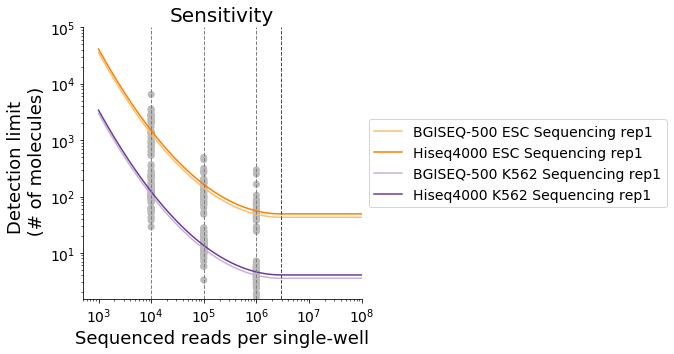

In [5]:
figsize(5,5)
matplotlib.rcParams.update({'font.size': 14})
names = ['BGISEQ-500 ESC Sequencing rep1', 
         'Hiseq4000 ESC Sequencing rep1', 
         'BGISEQ-500 K562 Sequencing rep1','Hiseq4000 K562 Sequencing rep1']
colors = [matplotlib.colors.rgb2hex(plt.get_cmap("Paired")(i)) for i in range(6,10)]
ax = fit_sensitivity(df,fun='np.log10(detection_limit_ERCC)', key1 ='detection_limit_ERCC',key2="num_processed",key3='Protocol2', \
                     yscale='log', xlabel = 'Sequenced reads per single-well',\
                     ylabel = 'Detection limit \n (# of molecules)', \
                     ylim = [0, 1e5], xlim = [500, 1e8], \
                     xlabelsize = 18, ylabelsize = 18, \
                     title = 'Sensitivity', titlesize = 20, names = names, colors = colors)

accuracy_ERCC ~ np.power(np.log10(num_processed), 2) + np.log10(num_processed) + C(Protocol2) + 1
                            OLS Regression Results                            
Dep. Variable:          accuracy_ERCC   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     44.20
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           4.05e-35
Time:                        17:33:18   Log-Likelihood:                 546.46
No. Observations:                 348   AIC:                            -1081.
Df Residuals:                     342   BIC:                            -1058.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.9

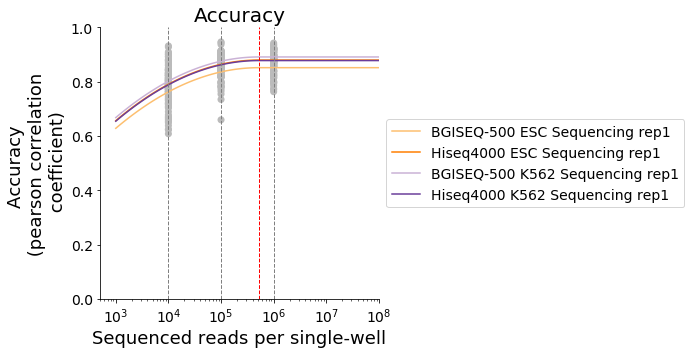

In [6]:
ax = fit_sensitivity(df, fun = 'accuracy_ERCC',key1="accuracy_ERCC",key2="num_processed",key3='Protocol2', \
                     xlabel = 'Sequenced reads per single-well',\
                     ylabel = 'Accuracy \n (pearson correlation \n coefficient)', \
                     ylim = [0, 1], xlim = [500, 1e8], \
                     xlabelsize = 18, ylabelsize = 18, \
                     title = 'Accuracy', titlesize = 20, names = names, colors = colors)

# Pseudobulk

In [165]:
dfs = []
for f in ['bgi','sanger']:
    df = pd.read_csv("../pdata1/%s.csv"%f, index_col=0)
    dfs.append(df)
df = pd.concat(dfs, axis=0)

In [166]:
df.shape

(632, 34866)

In [167]:
df['Protocol2'].value_counts()

BGISEQ-500 SMARTer                 96
HiSeq-2000 Smart-Seq2 rep1         96
HiSeq-2000 SMARTer                 96
BGISEQ-500 Smart-Seq2 rep1         95
BGISEQ-500 Smart-Seq2 rep2         72
HiSeq-2000 Smart-Seq2 rep2         61
BGISEQ-500 K562 Seuqencing rep1    37
Hiseq4000 K562 Sequencing rep1     37
Hiseq4000 ESC Sequencing rep1      21
BGISEQ-500 ESC Sequencing rep1     21
Name: Protocol2, dtype: int64

In [21]:
df1 = df[df.columns[df.columns.str.startswith('ENS')|df.columns.str.startswith('Protocol2')]]
df1 = df1.groupby('Protocol2').sum()

In [23]:
df1.to_csv("../pdata1/pseudobulk.csv")

In [91]:
df1 = pd.read_csv("../pdata1/pseudobulk.csv", index_col=0)

In [92]:
df1.head(2)

,ENSMUSG00000107196.1,ENSMUSG00000106901.1,ENSMUSG00000107077.1,ENSMUSG00000097549.2,ENSMUSG00000104359.1,ENSMUSG00000107088.1,ENSMUSG00000111721.1,ENSMUSG00000111588.1,ENSMUSG00000107210.1,ENSMUSG00000097359.2,...,ENSMUSG00000083997.1,ENSMUSG00000111337.1,ENSMUSG00000109159.1,ENSMUSG00000107243.1,ENSMUSG00000110425.1,ENSMUSG00000066315.9,ENSMUSG00000073771.11,ENSMUSG00000107035.1,ENSMUSG00000080242.5,ENSMUSG00000081408.1
Protocol2,,,,,,,,,,,,,,,,,,,,,
BGISEQ-500 ESC Sequencing rep1,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.5,...,0.00000,1.00150,0.0,0.0,3.000,93910.630000,3727.07596,435.45573,8266.4670,8.00000
BGISEQ-500 K562 Seuqencing rep1,0.5,0.0,14.0127,0.0,0.0,0.0,0.5,0.0,0.0,34.5,...,6.11582,40.14731,1.0,4.0,56.755,903.504673,68.28600,154.03886,4619.9553,1.04841


In [170]:
df1.index

Index(['BGISEQ-500 ESC Sequencing rep1', 'BGISEQ-500 K562 Seuqencing rep1',
       'BGISEQ-500 SMARTer', 'BGISEQ-500 Smart-Seq2 rep1',
       'BGISEQ-500 Smart-Seq2 rep2', 'HiSeq-2000 SMARTer',
       'HiSeq-2000 Smart-Seq2 rep1', 'HiSeq-2000 Smart-Seq2 rep2',
       'Hiseq4000 ESC Sequencing rep1', 'Hiseq4000 K562 Sequencing rep1'],
      dtype='object', name='Protocol2')

In [171]:
l1 = df1.index[df1.index.str.startswith('BGI')].tolist()
l2 = df1.index[df1.index.str.startswith('Hi')]

In [54]:
l1 = ['BGISEQ-500 ESC Sequencing rep1',
 'BGISEQ-500 K562 Seuqencing rep1',
 'BGISEQ-500 SMARTer',
 'BGISEQ-500 Smart-Seq2 rep1',
 'BGISEQ-500 Smart-Seq2 rep2']

In [55]:
l2 = ['Hiseq4000 ESC Sequencing rep1',
 'Hiseq4000 K562 Sequencing rep1',
 'HiSeq-2000 SMARTer',
 'HiSeq-2000 Smart-Seq2 rep1',
 'HiSeq-2000 Smart-Seq2 rep2']

In [56]:
names = []
corrs = []
for i,j in zip(l1,l2):
    cor = df1.loc[i].corr(df1.loc[j], method='pearson')
    corrs.append(cor)
    names.append(i.replace('BGISEQ-500 ',''))

In [57]:
df = pd.DataFrame({'name':names,'corr':corrs})

> This is the pseudobulk table.

In [58]:
df

,corr,name
0,0.979305,ESC Sequencing rep1
1,0.976184,K562 Seuqencing rep1
2,0.976761,SMARTer
3,0.966934,Smart-Seq2 rep1
4,0.933008,Smart-Seq2 rep2


In [93]:
df = pd.DataFrame(numpy.corrcoef(df1), index = df1.index, columns = df1.index)

> This is an all-to-all correlation table.

## show a heatmap

In [94]:
df

Protocol2,BGISEQ-500 ESC Sequencing rep1,BGISEQ-500 K562 Seuqencing rep1,BGISEQ-500 SMARTer,BGISEQ-500 Smart-Seq2 rep1,BGISEQ-500 Smart-Seq2 rep2,HiSeq-2000 SMARTer,HiSeq-2000 Smart-Seq2 rep1,HiSeq-2000 Smart-Seq2 rep2,Hiseq4000 ESC Sequencing rep1,Hiseq4000 K562 Sequencing rep1
Protocol2,,,,,,,,,,
BGISEQ-500 ESC Sequencing rep1,1.000000,0.260707,0.675334,0.699834,0.701041,0.648285,0.695722,0.705250,0.979305,0.232673
BGISEQ-500 K562 Seuqencing rep1,0.260707,1.000000,0.310025,0.369512,0.355432,0.282112,0.374829,0.368372,0.282363,0.976184
BGISEQ-500 SMARTer,0.675334,0.310025,1.000000,0.833723,0.806252,0.976761,0.864373,0.888879,0.673151,0.271648
BGISEQ-500 Smart-Seq2 rep1,0.699834,0.369512,0.833723,1.000000,0.975974,0.764209,0.966934,0.915020,0.739477,0.334754
BGISEQ-500 Smart-Seq2 rep2,0.701041,0.355432,0.806252,0.975974,1.000000,0.747264,0.951291,0.933008,0.745700,0.322431
HiSeq-2000 SMARTer,0.648285,0.282112,0.976761,0.764209,0.747264,1.000000,0.829851,0.889031,0.629616,0.247128
HiSeq-2000 Smart-Seq2 rep1,0.695722,0.374829,0.864373,0.966934,0.951291,0.829851,1.000000,0.948526,0.730025,0.338473
HiSeq-2000 Smart-Seq2 rep2,0.705250,0.368372,0.888879,0.915020,0.933008,0.889031,0.948526,1.000000,0.713776,0.332444
Hiseq4000 ESC Sequencing rep1,0.979305,0.282363,0.673151,0.739477,0.745700,0.629616,0.730025,0.713776,1.000000,0.253058


In [47]:
df.index

Index(['BGISEQ-500 ESC Sequencing rep1', 'BGISEQ-500 K562 Seuqencing rep1',
       'BGISEQ-500 SMARTer', 'BGISEQ-500 Smart-Seq2 rep1',
       'BGISEQ-500 Smart-Seq2 rep2', 'HiSeq-2000 SMARTer',
       'HiSeq-2000 Smart-Seq2 rep1', 'HiSeq-2000 Smart-Seq2 rep2',
       'Hiseq4000 ESC Sequencing rep1', 'Hiseq4000 K562 Sequencing rep1'],
      dtype='object', name='Protocol2')

In [185]:
cols =['BGISEQ-500 SMARTer', 'HiSeq-2000 SMARTer','BGISEQ-500 Smart-Seq2 rep1','HiSeq-2000 Smart-Seq2 rep1',
       'BGISEQ-500 Smart-Seq2 rep2','HiSeq-2000 Smart-Seq2 rep2','BGISEQ-500 ESC Sequencing rep1', 
       'Hiseq4000 ESC Sequencing rep1', 'BGISEQ-500 K562 Seuqencing rep1',
       'Hiseq4000 K562 Sequencing rep1']

In [95]:
cols =['BGISEQ-500 SMARTer', 'HiSeq-2000 SMARTer','BGISEQ-500 Smart-Seq2 rep1','HiSeq-2000 Smart-Seq2 rep1',
       'BGISEQ-500 Smart-Seq2 rep2','HiSeq-2000 Smart-Seq2 rep2']

In [96]:
df = df[cols]

In [97]:
df = df.loc[cols]

## FigS1E

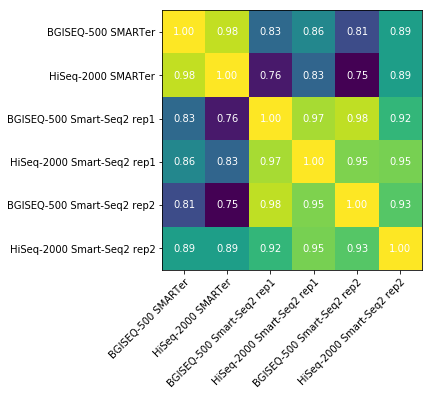

In [99]:
figsize(6,6)
fig, ax = plt.subplots()
im = ax.imshow(df.values)

# We want to show all ticks...
ax.set_xticks(np.arange(df.shape[0]))
ax.set_yticks(np.arange(df.shape[0]))
# ... and label them with the respective list entries
ax.set_xticklabels(df.index)
ax.set_yticklabels(df.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(df.shape[0]):
    for j in range(df.shape[0]):
        text = ax.text(j, i, '%.2f'%df.iloc[i, j],
                       ha="center", va="center", color="w")

# ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
# plt.show()
plt.savefig("Heatmap.pdf")

## FigS4H

In [81]:
from matplotlib_venn import venn3

In [129]:
df = pd.read_csv("../pdata1/pseudobulk.csv", index_col=0)

In [83]:
df

,ENSMUSG00000107196.1,ENSMUSG00000106901.1,ENSMUSG00000107077.1,ENSMUSG00000097549.2,ENSMUSG00000104359.1,ENSMUSG00000107088.1,ENSMUSG00000111721.1,ENSMUSG00000111588.1,ENSMUSG00000107210.1,ENSMUSG00000097359.2,...,ENSMUSG00000083997.1,ENSMUSG00000111337.1,ENSMUSG00000109159.1,ENSMUSG00000107243.1,ENSMUSG00000110425.1,ENSMUSG00000066315.9,ENSMUSG00000073771.11,ENSMUSG00000107035.1,ENSMUSG00000080242.5,ENSMUSG00000081408.1
Protocol2,,,,,,,,,,,,,,,,,,,,,
BGISEQ-500 ESC Sequencing rep1,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.00000,1.5,...,0.00000,1.00150,0.0,0.0,3.000000,93910.630000,3727.07596,435.455730,8266.467000,8.00000
BGISEQ-500 K562 Seuqencing rep1,0.500000,0.000000,14.012700,0.0,0.00000,0.0,0.5,0.0,0.00000,34.5,...,6.11582,40.14731,1.0,4.0,56.755000,903.504673,68.28600,154.038860,4619.955300,1.04841
BGISEQ-500 SMARTer,0.000030,0.499806,4.350594,0.0,0.00000,49.0,0.0,4.5,2.50142,2.0,...,42.04011,24.06719,2.0,0.0,15.000000,5876.940684,7344.42980,89.347747,25920.176150,5.00000
BGISEQ-500 Smart-Seq2 rep1,0.500000,0.000000,1.000000,0.0,0.00000,6.5,0.5,21.0,2.98755,0.5,...,1.00317,12.03787,0.0,0.0,13.677450,112372.769161,7700.67955,195.736000,31699.557991,3.00100
BGISEQ-500 Smart-Seq2 rep2,0.500000,0.000000,0.000000,0.0,16.70700,0.0,0.5,56.5,0.00000,0.0,...,33.01779,2.00152,0.0,1.0,6.000000,395535.680900,7341.01971,453.187161,41082.168500,0.00000
HiSeq-2000 SMARTer,0.332127,0.000000,1.681241,0.0,0.00000,13.0,0.0,0.5,1.67056,0.5,...,15.00129,3.00726,0.0,0.0,4.000000,197.692855,2872.91187,10.559021,6365.110330,2.00000
HiSeq-2000 Smart-Seq2 rep1,0.000000,0.500000,0.666667,0.0,0.00000,5.5,0.0,5.0,1.12381,0.0,...,3.00107,4.39114,0.0,0.0,4.000000,2911.986450,2988.47902,37.819600,8361.767588,1.00000
HiSeq-2000 Smart-Seq2 rep2,0.000000,0.000000,0.176734,0.0,3.38753,0.0,0.0,2.5,0.00000,0.0,...,1.00000,2.00328,0.0,0.0,1.000000,1792.305916,2115.65041,47.958863,5248.961560,0.00000
Hiseq4000 ESC Sequencing rep1,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.00000,1.5,...,1.00173,0.00000,0.0,0.0,4.000000,59157.470000,1528.69916,121.437330,6019.610000,1.00000


In [43]:
df.shape

(10, 34839)

In [84]:
from matplotlib_venn import venn2

BGISEQ-500 ESC Sequencing rep1


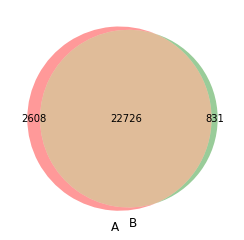

In [83]:
i=0
print(df.index[i])
venn2([set(df.loc[l1[i]][df.loc[l1[i]]>0].index), set(df.loc[l2[i]][df.loc[l2[i]]>0].index)])

BGISEQ-500 K562 Seuqencing rep1


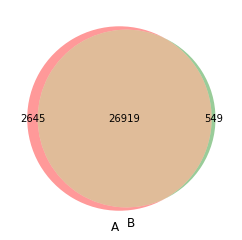

In [84]:
i=1
print(df.index[i])
venn2([set(df.loc[l1[i]][df.loc[l1[i]]>0].index), set(df.loc[l2[i]][df.loc[l2[i]]>0].index)])

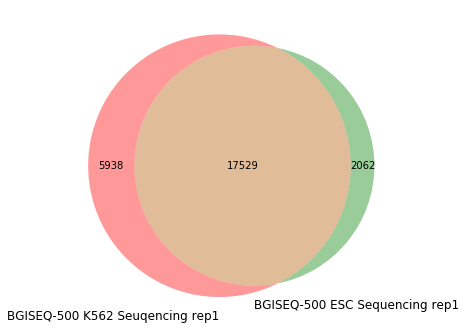

In [85]:
# print(df.index[i])
name1 = 'BGISEQ-500 K562 Seuqencing rep1'
name2 = 'BGISEQ-500 ESC Sequencing rep1'
venn2([set(df.loc[name1][df.loc[name1]>10].index), set(df.loc[name2][df.loc[name2]>10].index)],set_labels=(name1,name2))

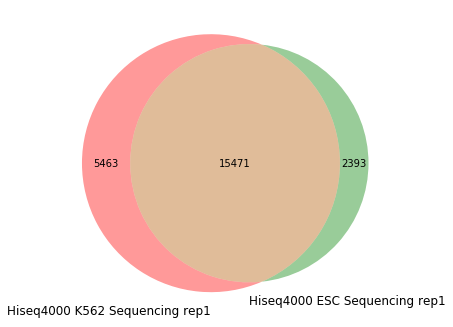

In [87]:
# print(df.index[i])
name1 = 'Hiseq4000 K562 Sequencing rep1'
name2 = 'Hiseq4000 ESC Sequencing rep1'
venn2([set(df.loc[name1][df.loc[name1]>10].index), set(df.loc[name2][df.loc[name2]>10].index)],set_labels=(name1,name2))

In [130]:
name1 = 'Hiseq4000 K562 Sequencing rep1'
name2 = 'Hiseq4000 ESC Sequencing rep1'
x1 = df.loc[name1][df.loc[name1]>10].index
x2 = df.loc[name2][df.loc[name2]>10].index
name1 = 'BGISEQ-500 K562 Seuqencing rep1'
name2 = 'BGISEQ-500 ESC Sequencing rep1'
x3 = df.loc[name1][df.loc[name1]>10].index
x4 = df.loc[name2][df.loc[name2]>10].index

In [131]:
overlap = x3[x3.isin(x4)]

In [134]:
pd.Series(overlap).to_csv("overlap.csv")

In [135]:
non1 = x3[~x3.isin(x4)]

In [136]:
pd.Series(non1).to_csv("k562only_genes.csv")

In [137]:
non2 = x4[~x4.isin(x3)]

In [138]:
pd.Series(non2).to_csv("ESConly_genes.csv")

In [89]:
x5 = x3[x3.isin(x1)]
x6 = x4[x4.isin(x2)]

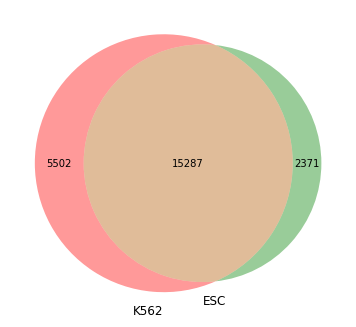

In [90]:
venn2([set(x5), set(x6)],set_labels=('K562','ESC'))

BGISEQ-500 SMARTer


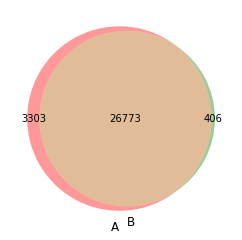

In [85]:
i=2
print(df.index[i])
venn2([set(df.loc[l1[i]][df.loc[l1[i]]>0].index), set(df.loc[l2[i]][df.loc[l2[i]]>0].index)])

BGISEQ-500 Smart-Seq2 rep1


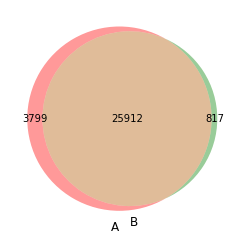

In [86]:
i=3
print(df.index[i])
venn2([set(df.loc[l1[i]][df.loc[l1[i]]>0].index), set(df.loc[l2[i]][df.loc[l2[i]]>0].index)])

BGISEQ-500 Smart-Seq2 rep2


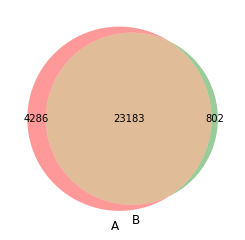

In [87]:
i=4
print(df.index[i])
venn2([set(df.loc[l1[i]][df.loc[l1[i]]>0].index), set(df.loc[l2[i]][df.loc[l2[i]]>0].index)])

# FigS1D CV^2 vs. Mean

In [7]:
dfs = []
for f in ['bgi','sanger']:
    df = pd.read_csv("../pdata1/%s.csv"%f, index_col=0)
    dfs.append(df)
df = pd.concat(dfs, axis=0)

df1 = df[df.columns[df.columns.str.startswith('ENS')|df.columns.str.startswith('Protocol2')]]

In [8]:
df = df1.T

In [9]:
names = df.loc['Protocol2'].unique()

In [10]:
for s in df.loc['Protocol2'].unique():
#     print(s)
    df['%s_mean'%s] = np.mean(df.loc[:,df.loc['Protocol2'] == s].iloc[:-1,:],1)
    df['%s_var'%s] = np.var(df.loc[:,df.loc['Protocol2'] == s].iloc[:-1,:],1)
    df['%s_drop'%s] = np.sum((df.loc[:,df.loc['Protocol2'] == s].iloc[:-1,:]==0),1) \
    / df.loc[:,df.loc['Protocol2'] == s].shape[1]
    df['%s_cv2'%s] = df['%s_var'%s]/(df['%s_mean'%s]**2)
df = df.iloc[:-1,:]

In [12]:
names

array(['BGISEQ-500 Smart-Seq2 rep2', 'BGISEQ-500 Smart-Seq2 rep1',
       'BGISEQ-500 SMARTer', 'BGISEQ-500 K562 Seuqencing rep1',
       'BGISEQ-500 ESC Sequencing rep1', 'Hiseq4000 K562 Sequencing rep1',
       'Hiseq4000 ESC Sequencing rep1', 'HiSeq-2000 SMARTer',
       'HiSeq-2000 Smart-Seq2 rep1', 'HiSeq-2000 Smart-Seq2 rep2'],
      dtype=object)

In [13]:
namet = [['BGISEQ-500 Smart-Seq2 rep2','HiSeq-2000 Smart-Seq2 rep2'],
         ['BGISEQ-500 Smart-Seq2 rep1','HiSeq-2000 Smart-Seq2 rep1'],
         ['BGISEQ-500 SMARTer','HiSeq-2000 SMARTer'],
         ['BGISEQ-500 K562 Seuqencing rep1','Hiseq4000 K562 Sequencing rep1',],
         ['BGISEQ-500 ESC Sequencing rep1','Hiseq4000 ESC Sequencing rep1']]
titles = ['Smart-Seq2 rep2',
          'Smart-Seq2 rep1',
          'SMARTer',
          'K562',
          'ESC']

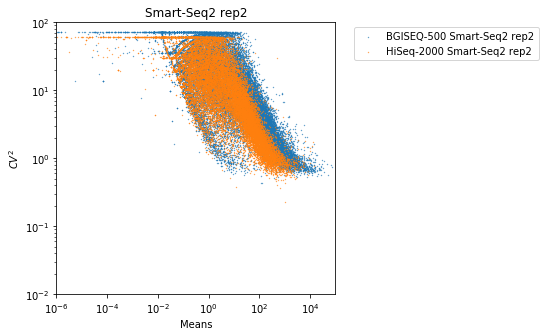

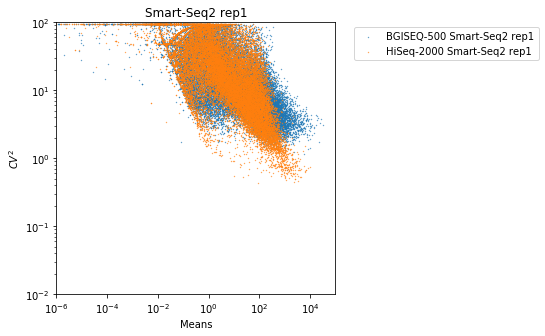

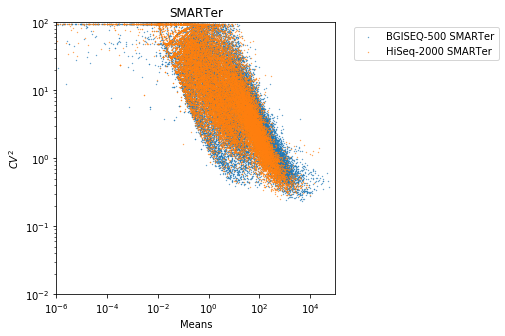

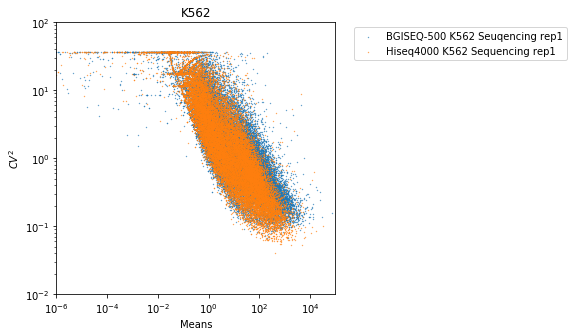

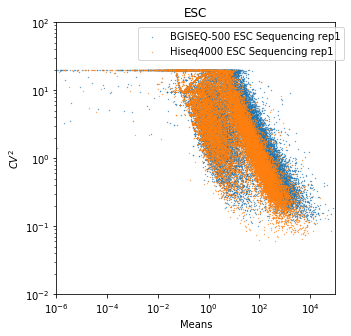

In [15]:
figsize(5,5)
for tt, nameu in zip(titles,namet):
    plt.clf()
    plt.loglog()
    for s in nameu:
        plt.scatter(df['%s_mean'%s], df['%s_cv2'%s], s = 0.1, label = s)
    plt.xlim(1e-6, 1e5)
    plt.ylim(1e-2, 1e2);
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.title(tt)
    plt.xlabel("Means")
    plt.ylabel("$CV^2$")
    plt.show()

## Fig S1D2

In [17]:
df.head()

,CL100029125_L01_12,CL100029125_L01_19,CL100029125_L01_20,CL100029125_L01_21,CL100029125_L02_23,CL100029125_L01_45,CL100029125_L02_25,CL100029125_L02_19,CL100029125_L02_37,CL100029125_L01_9,...,HiSeq-2000 SMARTer_drop,HiSeq-2000 SMARTer_cv2,HiSeq-2000 Smart-Seq2 rep1_mean,HiSeq-2000 Smart-Seq2 rep1_var,HiSeq-2000 Smart-Seq2 rep1_drop,HiSeq-2000 Smart-Seq2 rep1_cv2,HiSeq-2000 Smart-Seq2 rep2_mean,HiSeq-2000 Smart-Seq2 rep2_var,HiSeq-2000 Smart-Seq2 rep2_drop,HiSeq-2000 Smart-Seq2 rep2_cv2
ENSMUSG00000107196.1,0,0,0,0,0,0,0,0,0,0,...,0.979167,94.999492,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,1.000000,NaN
ENSMUSG00000106901.1,0,0,0,0,0,0,0,0,0,0,...,1.000000,NaN,0.005208,0.002577,0.989583,95.0,0.000000,0.000000,1.000000,NaN
ENSMUSG00000107077.1,0,0,0,0,0,0,0,0,0,0,...,0.968750,63.134037,0.006944,0.004581,0.989583,95.0,0.002897,0.000504,0.983607,60.0
ENSMUSG00000097549.2,0,0,0,0,0,0,0,0,0,0,...,1.000000,NaN,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,1.000000,NaN
ENSMUSG00000104359.1,0,0,0,0,0,0,0,0,0,0,...,1.000000,NaN,0.000000,0.000000,1.000000,NaN,0.055533,0.185037,0.983607,60.0


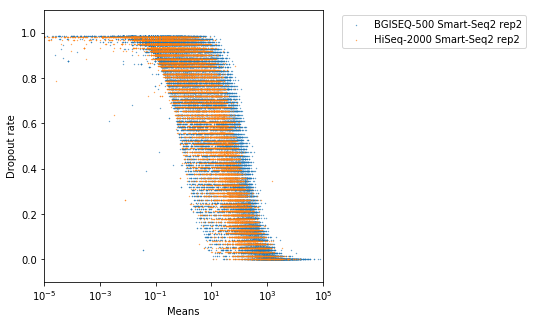

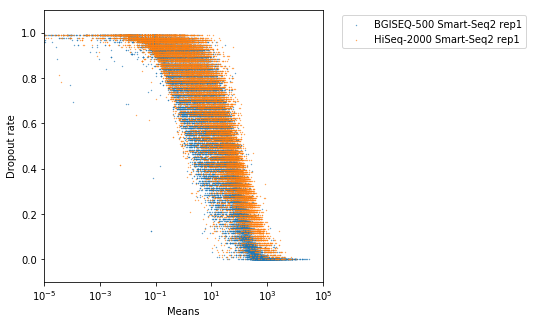

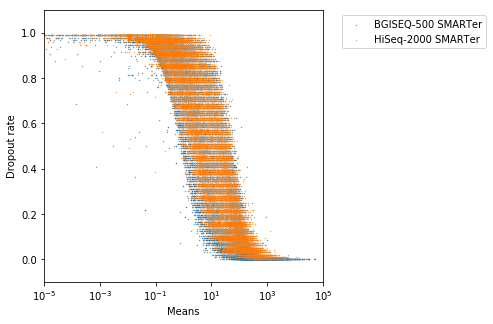

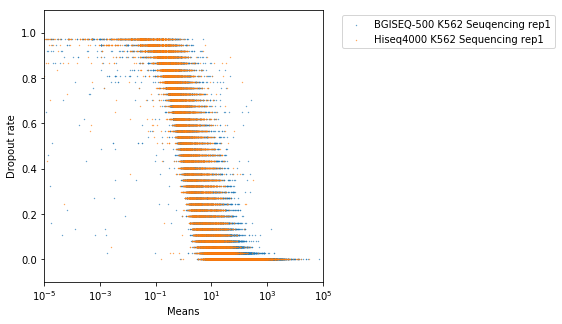

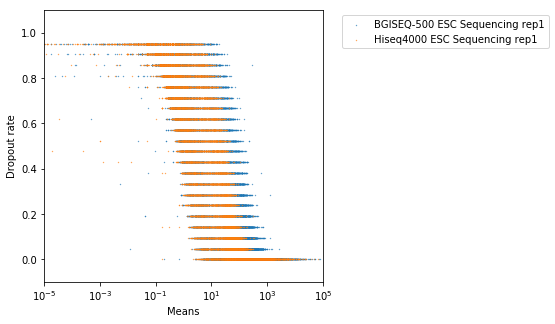

In [18]:
for tt, nameu in zip(titles,namet):
    plt.clf()
    plt.xscale('log')
    for s in nameu:
        plt.scatter(df['%s_mean'%s], df['%s_drop'%s], s = 0.1, label = s)
    plt.xlim(1e-5, 1e5)
    plt.ylim(-0.1, 1.1);
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.xlabel("Means")
    plt.ylabel("Dropout rate")
    plt.show()

# Fig S1D34

In [51]:
df1 = pd.read_csv("../data/fLen_bgi.csv", index_col=0)
df2 = pd.read_csv("../data/fLen_sanger.csv", index_col=0)

df = pd.concat([df1,df2])

df.index = df.index.str.split('/').str[-1]

In [55]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
CL100029124_L01_12,8.284890e-31,9.816330e-06,1.833900e-05,1.972370e-05,1.108990e-05,2.517170e-06,1.071380e-06,4.285540e-06,6.428310e-06,4.285540e-06,...,1.062910e-07,4.251650e-07,6.819520e-07,6.019870e-07,3.715240e-07,1.768220e-07,4.420550e-08,0.000043,0.000174,0.000260
CL100029124_L01_28,8.870040e-31,3.966090e-07,2.644060e-07,6.610140e-08,4.336570e-30,6.422650e-30,9.497030e-30,1.402060e-29,2.066570e-29,3.041160e-29,...,2.979950e-06,1.986640e-06,4.966590e-07,1.073620e-17,1.073620e-17,1.073620e-17,1.073620e-17,0.000031,0.000123,0.000184
CL100029124_L01_38,8.139690e-31,1.161480e-05,7.743190e-06,1.935800e-06,3.979500e-30,5.893820e-30,8.715060e-30,4.557650e-07,1.823060e-06,2.734590e-06,...,9.852150e-18,9.852150e-18,9.852150e-18,9.852150e-18,9.852150e-18,9.852150e-18,9.852150e-18,0.000017,0.000068,0.000102
CL100029124_L01_45,7.785850e-31,2.643520e-06,3.689320e-06,2.367560e-06,5.780930e-07,5.637610e-30,8.336200e-30,1.230680e-29,1.813970e-29,4.154280e-08,...,4.835470e-06,1.208870e-06,9.423870e-18,9.423870e-18,9.423870e-18,9.423870e-18,9.423870e-18,0.000023,0.000092,0.000138
CL100029124_L02_32,6.973910e-31,6.799030e-07,1.610290e-06,3.041640e-06,3.712580e-06,2.361730e-06,9.809230e-07,3.749670e-06,1.109380e-05,1.472550e-05,...,5.379660e-06,8.069480e-06,5.379660e-06,1.344910e-06,8.436460e-18,8.436460e-18,8.436460e-18,0.000039,0.000157,0.000235


In [63]:
df['Protocol2'] = phn.loc[df.index]['Protocol2']
df = df[~df.Protocol2.isna()]

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [66]:
df.shape

(630, 1002)

In [71]:
df.columns = list(arange(1001)+1)+['Protocol2']

In [89]:
df['Protocol2'] = df['Protocol2'].str.replace('Seuqencing','Sequencing')

In [67]:
df.Protocol2.value_counts()

HiSeq-2000 Smart-Seq2 rep1         96
BGISEQ-500 SMARTer                 96
BGISEQ-500 Smart-Seq2 rep1         95
HiSeq-2000 SMARTer                 95
BGISEQ-500 Smart-Seq2 rep2         72
HiSeq-2000 Smart-Seq2 rep2         60
BGISEQ-500 K562 Seuqencing rep1    37
Hiseq4000 K562 Sequencing rep1     37
BGISEQ-500 ESC Sequencing rep1     21
Hiseq4000 ESC Sequencing rep1      21
Name: Protocol2, dtype: int64

In [90]:
colors = [matplotlib.colors.rgb2hex(plt.get_cmap("Paired")(i)) for i in range(0,10)]

In [91]:
cc = dict(zip(df.Protocol2.unique(),colors))

Text(0,0.5,'density')

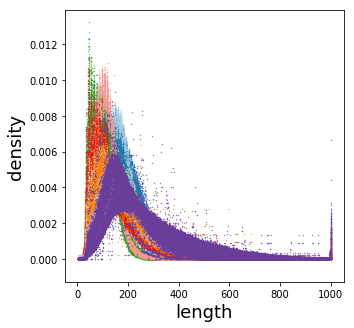

In [79]:
figsize(5,5)
for i in arange(df.shape[0]):
    plt.scatter(arange(1001)+1, df.iloc[i][:-1], s = 0.1, label = df.iloc[i][-1], c = cc[df.iloc[i][-1]])
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

Text(0,0.5,'density')

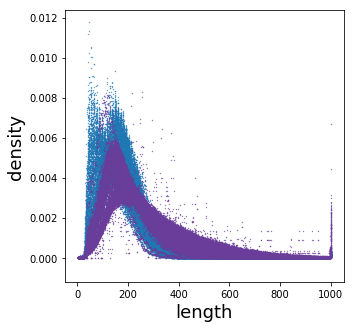

In [82]:
figsize(5,5)
df1 = df[df.Protocol2.str.endswith('Smart-Seq2 rep1')]
for i in arange(df1.shape[0]):
    plt.scatter(arange(1001)+1, df1.iloc[i][:-1], s = 0.1, label = df1.iloc[i][-1], c = cc[df1.iloc[i][-1]])
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

Text(0,0.5,'density')

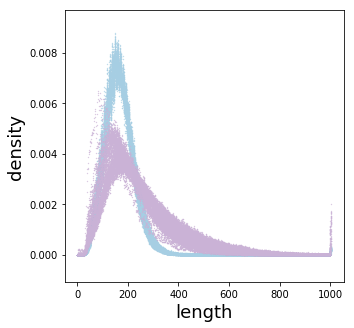

In [83]:
figsize(5,5)
df1 = df[df.Protocol2.str.endswith('Smart-Seq2 rep2')]
for i in arange(df1.shape[0]):
    plt.scatter(arange(1001)+1, df1.iloc[i][:-1], s = 0.1, label = df1.iloc[i][-1], c = cc[df1.iloc[i][-1]])
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

Text(0,0.5,'density')

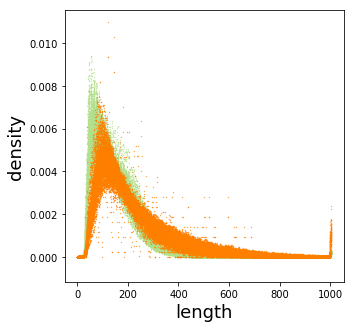

In [84]:
figsize(5,5)
df1 = df[df.Protocol2.str.endswith('SMARTer')]
for i in arange(df1.shape[0]):
    plt.scatter(arange(1001)+1, df1.iloc[i][:-1], s = 0.1, label = df1.iloc[i][-1], c = cc[df1.iloc[i][-1]])
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

Text(0,0.5,'density')

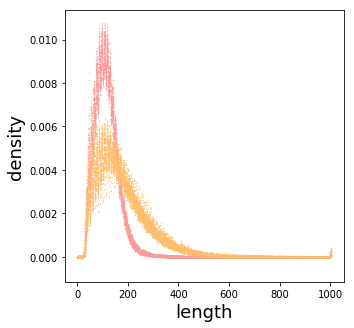

In [85]:
figsize(5,5)
df1 = df[df.Protocol2.str.endswith('ESC Sequencing rep1')]
for i in arange(df1.shape[0]):
    plt.scatter(arange(1001)+1, df1.iloc[i][:-1], s = 0.1, label = df1.iloc[i][-1], c = cc[df1.iloc[i][-1]])
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

Text(0,0.5,'density')

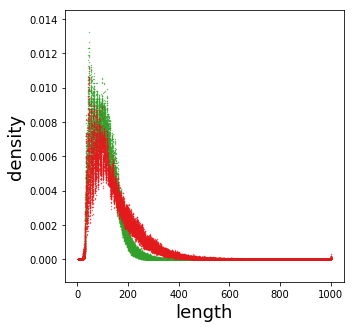

In [92]:
figsize(5,5)
df1 = df[df.Protocol2.str.endswith('K562 Sequencing rep1')]
for i in arange(df1.shape[0]):
    plt.scatter(arange(1001)+1, df1.iloc[i][:-1], s = 0.1, label = df1.iloc[i][-1], c = cc[df1.iloc[i][-1]])
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

# Fig S1D4

In [39]:
df1 = pd.read_csv("../data/coverage_bgi.csv", index_col=0)
df2 = pd.read_csv("../data/coverage_sanger.csv", index_col=0)
phn = pd.read_csv("../data/phn.csv",index_col=0)
df = pd.concat([df1,df2], axis=0)

df.index = df.index.str.split('/').str[-1]

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
CL100029124_L01_12,0.023623,0.036296,0.047187,0.054767,0.054920,0.060736,0.059592,0.059710,0.059129,0.059074,0.057511,0.057206,0.057423,0.058895,0.058921,0.061339,0.061335,0.055574,0.016204,0.000557
CL100029124_L01_28,0.024580,0.037725,0.048140,0.055931,0.055831,0.061910,0.060384,0.059999,0.059907,0.059479,0.057508,0.056610,0.056575,0.058095,0.057722,0.060169,0.060578,0.053653,0.014312,0.000895
CL100029124_L01_38,0.026996,0.039082,0.047983,0.054802,0.054964,0.059027,0.057418,0.056112,0.057089,0.057300,0.055814,0.056178,0.055539,0.059096,0.056869,0.063819,0.065598,0.057757,0.016861,0.001696
CL100029124_L01_45,0.023437,0.036906,0.048471,0.056640,0.057062,0.062720,0.060768,0.060917,0.060976,0.060245,0.058028,0.057346,0.057036,0.057178,0.057443,0.058911,0.058989,0.052235,0.014138,0.000554
CL100029124_L02_32,0.022339,0.036751,0.049051,0.056504,0.057486,0.063056,0.062523,0.062156,0.061282,0.059827,0.058960,0.057597,0.056417,0.056797,0.057190,0.058179,0.058382,0.051513,0.013463,0.000527


In [41]:
df['Protocol2'] = phn.loc[df.index]['Protocol2']
df = df[~df.Protocol2.isna()]

 /Users/zmiao/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [42]:
df.shape

(630, 21)

In [43]:
df.columns = list(np.linspace(0, 100, 20))+['Protocol2']

In [44]:
df['Protocol2'] = df['Protocol2'].str.replace('Seuqencing','Sequencing')

In [45]:
df.Protocol2.value_counts()

BGISEQ-500 SMARTer                 96
HiSeq-2000 Smart-Seq2 rep1         96
HiSeq-2000 SMARTer                 95
BGISEQ-500 Smart-Seq2 rep1         95
BGISEQ-500 Smart-Seq2 rep2         72
HiSeq-2000 Smart-Seq2 rep2         60
Hiseq4000 K562 Sequencing rep1     37
BGISEQ-500 K562 Sequencing rep1    37
Hiseq4000 ESC Sequencing rep1      21
BGISEQ-500 ESC Sequencing rep1     21
Name: Protocol2, dtype: int64

In [46]:
colors = [matplotlib.colors.rgb2hex(plt.get_cmap("Paired")(i)) for i in range(0,10)]

In [47]:
cc = dict(zip(df.Protocol2.unique(),colors))

Text(0,0.5,'density')

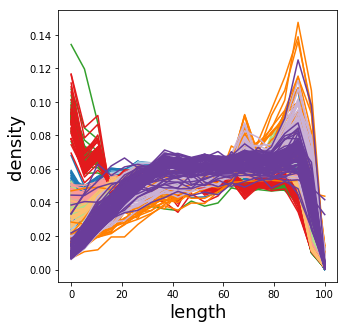

In [48]:
figsize(5,5)
for i in arange(df.shape[0]):
    plt.plot(np.linspace(0, 100, 20), df.iloc[i][:-1], label = df.iloc[i][-1], c = cc[df.iloc[i][-1]])
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

Text(0,0.5,'density')

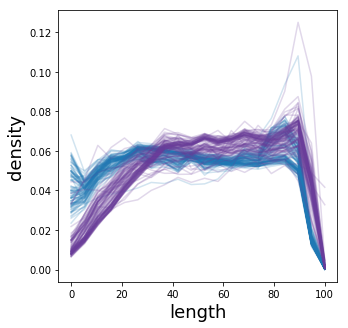

In [51]:
figsize(5,5)
df1 = df[df.Protocol2.str.endswith('Smart-Seq2 rep1')]
for i in arange(df1.shape[0]):
    plt.plot(np.linspace(0, 100, 20), df1.iloc[i][:-1], label = df1.iloc[i][-1], c = cc[df1.iloc[i][-1]],\
             alpha=0.2)
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

Text(0,0.5,'density')

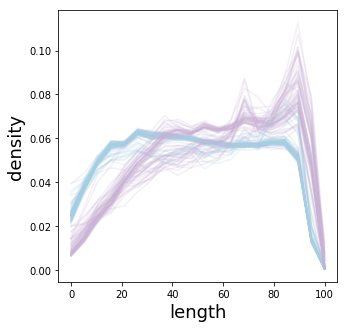

In [52]:
figsize(5,5)
df1 = df[df.Protocol2.str.endswith('Smart-Seq2 rep2')]
for i in arange(df1.shape[0]):
    plt.plot(np.linspace(0, 100, 20), df1.iloc[i][:-1], label = df1.iloc[i][-1], c = cc[df1.iloc[i][-1]],\
             alpha=0.2)
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

Text(0,0.5,'density')

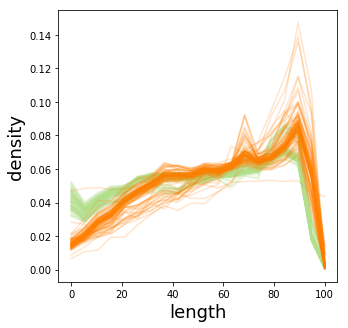

In [53]:
figsize(5,5)
df1 = df[df.Protocol2.str.endswith('SMARTer')]
for i in arange(df1.shape[0]):
    plt.plot(np.linspace(0, 100, 20), df1.iloc[i][:-1], label = df1.iloc[i][-1], c = cc[df1.iloc[i][-1]],\
             alpha=0.2)
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

Text(0,0.5,'density')

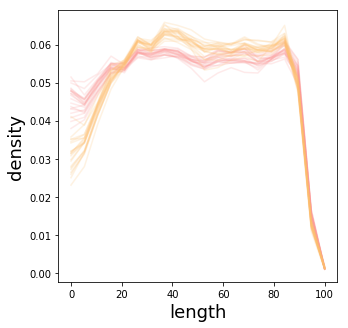

In [54]:
figsize(5,5)
df1 = df[df.Protocol2.str.endswith('ESC Sequencing rep1')]
for i in arange(df1.shape[0]):
    plt.plot(np.linspace(0, 100, 20), df1.iloc[i][:-1], label = df1.iloc[i][-1], c = cc[df1.iloc[i][-1]],\
             alpha=0.2)
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

Text(0,0.5,'density')

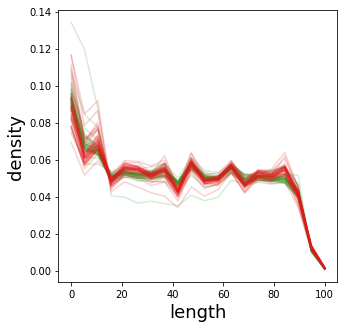

In [55]:
figsize(5,5)
df1 = df[df.Protocol2.str.endswith('K562 Sequencing rep1')]
for i in arange(df1.shape[0]):
    plt.plot(np.linspace(0, 100, 20), df1.iloc[i][:-1], label = df1.iloc[i][-1], c = cc[df1.iloc[i][-1]],\
             alpha=0.2)
plt.xlabel('length', fontsize=18)
plt.ylabel('density', fontsize=18)

# End